In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [495]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [496]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [497]:
df_train.info()
print('\n')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [498]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCormack, Mr. Thomas Joseph",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


- There are 891 datapoints
- Names are completely unique
- There are more males than females (64.76 % of males and 35.24 % of females)
- There is fairly high ratio of duplicate tickets (22 %)
- Cabin column has only 204 values indicating that a lot of data is missing.
- Embark has three unique values. Most of the people used S port to embark

In [499]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 38.38 % of the people survived
- There are three separate classes in Titanic. Most people sailed in 3rd class.  
- Average age of people on board is 29.69 years. There are only few elderly people on board.
- Approximately 30 % of the people had siblings and/or spouse on the trip
- More than 75 % of the people sailed without their parents or children
- Average fare was 32.2 dolars. Very few people had very expensive tickets. Highest price was for 512 dolars.

In [500]:
df_train[['Pclass', 'Fare', 'Age', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Fare,Age,Survived
0,1,84.154687,38.233441,0.629630
1,2,20.662183,29.877630,0.472826
2,3,13.675550,25.140620,0.242363


In [501]:
df_train[['Sex', 'Age', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Age,Survived
0,female,27.915709,0.742038
1,male,30.726645,0.188908


In [502]:
df_train[['SibSp', 'Age', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Age,Survived
1,1,30.089727,0.535885
2,2,22.620000,0.464286
0,0,31.397558,0.345395
3,3,13.916667,0.250000
4,4,7.055556,0.166667
5,5,10.200000,0.000000
6,8,NaN,0.000000


In [503]:
df_train[['Parch', 'Age', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Age,Survived
3,3,33.200000,0.600000
1,1,24.422000,0.550847
2,2,17.216912,0.500000
0,0,32.178503,0.343658
5,5,39.200000,0.200000
4,4,44.500000,0.000000
6,6,43.000000,0.000000


In [504]:
def child_adult_elderly(x):
    if x <= 5:
        return 'age <= 5'
    elif 5 < x <= 15:
        return '5 < age <= 15'
    elif 15 < x <= 30:
        return '15 < age <= 30'
    elif 30 < x <= 50:
        return '30 < age <= 50'
    elif 50 < x <= 75:
        return '50 < age <= 75'
    elif x > 75:
        return 'age > 75'

df_train['age_interval'] = df_train['Age'].apply(lambda x: child_adult_elderly(x))

df_train[['age_interval', 'Survived']].groupby(['age_interval'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,age_interval,Survived
5,age > 75,1.000000
4,age <= 5,0.704545
2,5 < age <= 15,0.461538
1,30 < age <= 50,0.423237
0,15 < age <= 30,0.358896
3,50 < age <= 75,0.333333


In [505]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Observations:

Age: age correlates with the survival rate. Main conclusions are:
   - elderlies (older then 75 years) survived
   - small children (younger then 5 years of age) had high survival rate (70 %)
   - children of age between 5 and 15 years of age had 46 % survival rate
   - similar results was observed for the adults up to 50 years of age (42 %)
   - young people and group between 50 and 75 years of age has low survival rate 35 % and 33 % respectively
    
Siblings/spouse: People travelling with siblings or spouse up to the number of three managed to survive more often then people travelling with more siblings/spouse.
    
Parents/children: People with maximum 3 parents / childrens vere more likely to survieve (above 50 %) then lonesome travelers and people with more parents / childrens (below 34 %)
    
Sex: Females was far more likely to survive then males (74 % compare to 19 %)
    
Pclass: People from the first class were more likely to survive then people from other classes.

Embarked: Most people who survived embarked in the C (Cherbourg) port 



### Selecting features

#### Unused features
- Name variable will be dropped. It does not contribute to the survival rate
- Cabin feature will be also dropped as it consists of large number of NaN
- Ticket will be dropped as well.

#### Assumptions
Individual assumtions will be analysed based on the data visualization

1) Age contributes to survival rate

2) Sex contributes to survival rate

3) Pclass, fare correlates with survival rate

4) Embarked feature contributes to the survival rate

5) Greater number of siblings/spouse (more then 3) reduce the survivability 

6) Greater number of parents/children (more then 3) reduce the survivability 



##### Testing assumption 1

Age contributes to survival rate

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Histogram died/survived ratio')

Text(0.5, 0, 'Age')

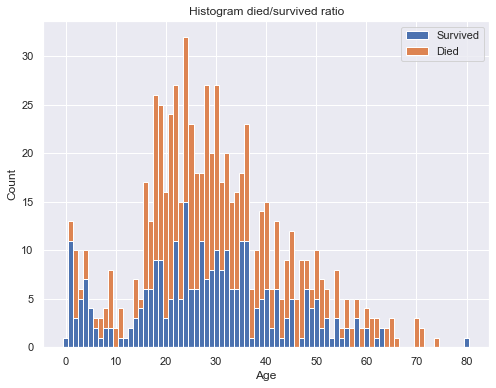

In [506]:
## Age histogram with survived/died ratio
data_reduced = df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Select data without NaN
data_reduced = data_reduced.dropna().reset_index(drop=True)
# Round age
data_reduced['Age'] = data_reduced['Age'].apply(lambda x: round(x))

N_bars = data_reduced['Age'].max()
survived = data_reduced['Age'].loc[data_reduced['Survived'] == 1].value_counts()
died = data_reduced['Age'].loc[data_reduced['Survived'] == 0].value_counts()

for i in range(N_bars+1):
    if i not in survived:
        s = pd.Series([0], index=[i])
        survived = survived.append(s)
    if i not in died:
        s = pd.Series([0], index=[i])
        died = died.append(s)  
        
survived = survived.sort_index()
died = died.sort_index()
ind = np.arange(N_bars+1)
width = 1

fig = plt.figure(figsize=(8,6))
p1 = plt.bar(ind, survived.values, width)
p2 = plt.bar(ind, died.values, width, bottom=survived.values)
plt.ylabel('Count')
plt.title('Histogram died/survived ratio')
plt.xlabel('Age')
plt.legend((p1[0], p2[0]), ('Survived', 'Died'))

plt.show()

##### Assumption 1 - Age feature conclusion
As seen from the figure above, most people were between 20 and 40 years old. This group also suffered the most as it recoded highest death ratio of all groupes.

Age will be used in following analysis

##### Testing assumption 2, 3 and 4

 - Sex contributes to survival rate
 - Pclass correlates with survival rate
 - Embarked feature contributes to the survival rate

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Survived/died - gender comparison')

[Text(0, 0, 'Died'), Text(0, 0, 'Survived')]

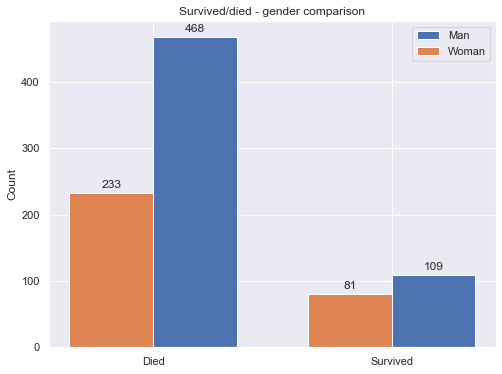

In [507]:
# Survived / died ratio - gender comparison
females_fare = df_train['Survived'].loc[df_train['Sex'] == 'female'].value_counts()
male_fare = df_train['Survived'].loc[df_train['Sex'] == 'male'].value_counts()

N = len(females_fare)
ind = np.arange(N)
width = 0.35
labels = ['Died', 'Survived']

fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
man = ax.bar(ind + width/2, male_fare, width, label='Man')
woman = ax.bar(ind - width/2, females_fare, width, label='Woman')

ax.set_ylabel('Count')
ax.set_title('Survived/died - gender comparison')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(man)
autolabel(woman)

plt.show()

C:\Users\Honza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\Honza\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



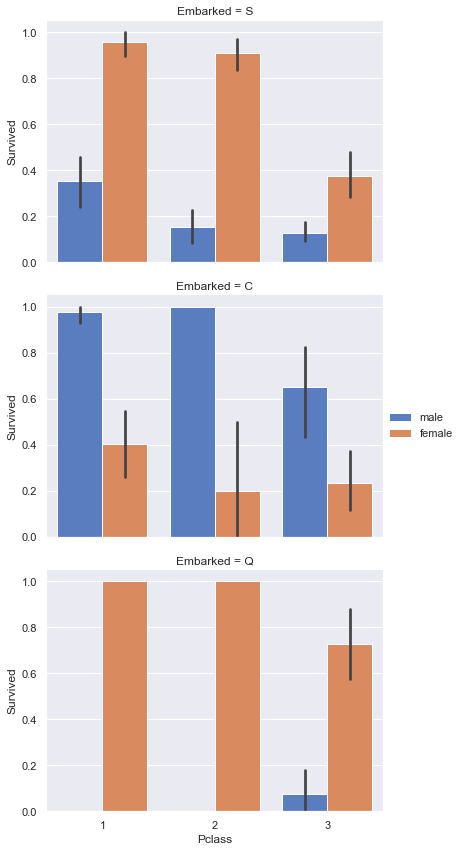

In [508]:
grid = sns.FacetGrid(df_train, row='Embarked', height=4, aspect=1.4)
grid.map(sns.barplot, 'Pclass', 'Survived', 'Sex', palette='muted')
grid.add_legend()

In [509]:
corre = df_train.corr()
corre['Pclass']

PassengerId   -0.035144
Survived      -0.338481
Pclass         1.000000
Age           -0.369226
SibSp          0.083081
Parch          0.018443
Fare          -0.549500
Name: Pclass, dtype: float64

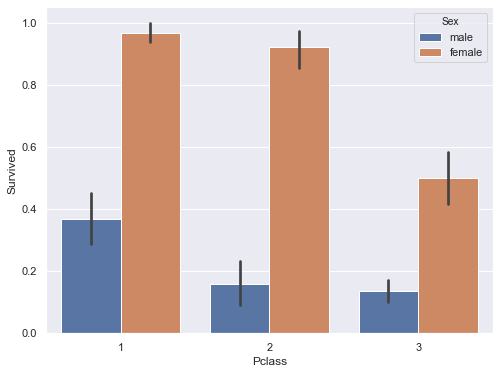

In [510]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_train)
plt.show()

##### Assumption 2 - sex feature conclusion
As seen from the figure above, females were more likely to survive the males. 

Sex will be used in following analysis

##### Assumption 3 - Pclass feature conclusion
People from the 1st class were more likely to survive then the other groups.

PClass will be used in following analysis. Prices in fare feature correlates with the PClass. Fare feature will be therefore also used in the analysis.

##### Assumption 4 - Embark feature conclusion
Each embarking station showed different results. Females showed higher survivability rate when embarked from the S and Q ports. Males on the other hand showed higher survivability rate then females when embarking from the C port.

Embark will be used in following analysis

##### Testing assumption 5 and 6

 - Greater number of siblings/spouse (more then 3) reduce the survivability 
 - Greater number of parents/children (more then 3) reduce the survivability 

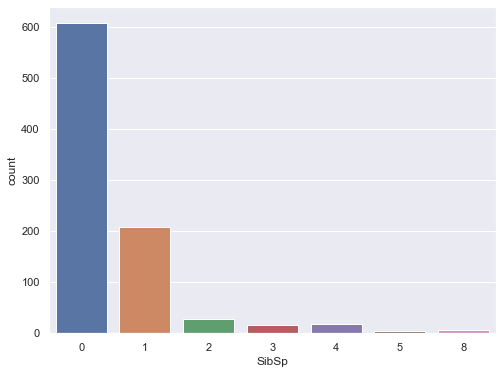

In [511]:
# Count plot for SibSp
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.countplot(x="SibSp", data=df_train)
plt.show()

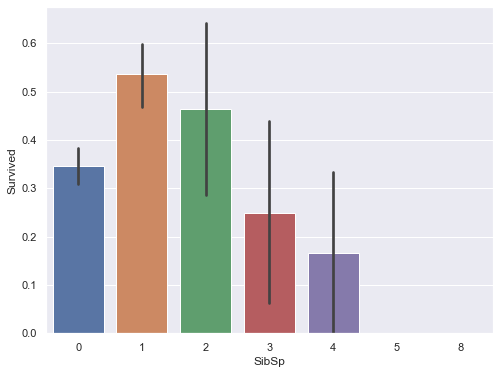

In [512]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.barplot(x="SibSp", y="Survived", data=df_train)
plt.show()

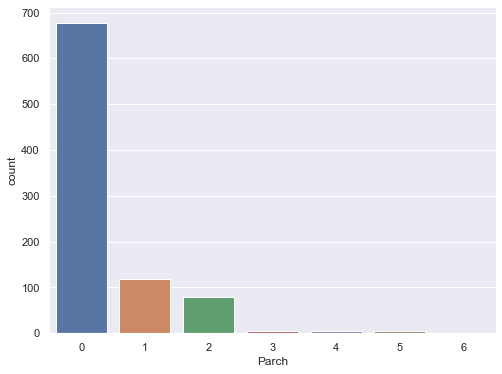

In [513]:
# Count plot for SibSp
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.countplot(x="Parch", data=df_train)
plt.show()

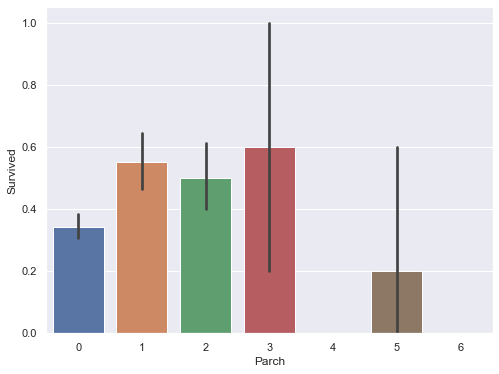

In [514]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax = sns.barplot(x="Parch", y="Survived", data=df_train)
plt.show()

##### Assumption 5 and 6 - Sibsp a Parch feature conclusion
Graphs showed that most of the people has no siblings, spouse/husbends ets. alongside with them. Features alone will therefore disregarded from the furher analysis.

Features will be however combined together to create new feature called accompanied.

### Data preprocessing

In [515]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_interval
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,15 < age <= 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30 < age <= 50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,15 < age <= 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30 < age <= 50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30 < age <= 50


#### Encoding Sex

sex will be encoded as follows: male = 0, female = 1


In [516]:
# df_train['Sex_encode'] = df_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
# df_train = df_train.drop(['Sex'], axis=1)

# Encode the Pclass into separate columns
df_sex = pd.get_dummies(df_train['Sex'])

In [517]:
# Encode the Pclass into separate columns
df_class = pd.get_dummies(df_train['Pclass']).rename(columns={1: "1st", 2: "2nd", 3: "3rd"})

# Encode the Embarked into separate columns
df_embarked = pd.get_dummies(df_train['Embarked']).rename(columns={"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})


In [518]:
train_data = pd.concat([df_train, df_sex, df_class, df_embarked], axis=1).drop(['Pclass', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)

In [519]:
# Imputing the missing data in Age feature using the mean strategy
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_to_fill = train_data['Age'].values.reshape(-1,1)
imp = imp.fit(data_to_fill)
imputed_data = imp.transform(data_to_fill).round()
train_data['Age'] = imputed_data
train_data['age_interval'] = train_data['Age'].apply(lambda x: child_adult_elderly(x))

In [520]:
# Encode the age interval feature into separate columns
df_age_interval = pd.get_dummies(train_data['age_interval'])


In [521]:
# Concat encoded age intervals to train data and drop age and age_interval features
train_data = pd.concat([train_data, df_age_interval], axis=1).drop(['Age', 'age_interval'], axis=1)
train_data.head()

,PassengerId,Survived,SibSp,Parch,Fare,female,male,1st,2nd,3rd,Cherbourg,Queenstown,Southampton,15 < age <= 30,30 < age <= 50,5 < age <= 15,50 < age <= 75,age <= 5,age > 75
0,1,0,1,0,7.2500,0,1,0,0,1,0,0,1,1,0,0,0,0,0
1,2,1,1,0,71.2833,1,0,1,0,0,1,0,0,0,1,0,0,0,0
2,3,1,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,0,0,0,0
3,4,1,1,0,53.1000,1,0,1,0,0,0,0,1,0,1,0,0,0,0
4,5,0,0,0,8.0500,0,1,0,0,1,0,0,1,0,1,0,0,0,0


In [522]:
# Travelling alone or with someone creating new feature
train_data['accompanied'] = train_data.apply(lambda row: 1 if row['SibSp'] > 0 or row['Parch'] > 0 else 0, axis=1)

In [523]:
# Drop SibSp and Parch
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)

In [524]:
def fare_intervals(x):
    if x <= 10.:
        return 'fare < 10'
    elif 10 < x <= 20:
        return '10 < fare < 20'
    elif 20 < x <= 30:
        return '20 < fare < 30'
    elif 30 < x <= 40:
        return '30 < fare < 40'
    elif 40 < x <= 50:
        return '40 < fare < 50'
    elif 50 < x <= 100:
        return '50 < fare < 100'
    elif 100 < x <= 200:
        return '100 < fare < 200'
    elif x > 200:
        return 'fare > 200'


train_data['fare_intervals'] = train_data['Fare'].apply(lambda x: fare_intervals(x))

In [525]:
# Drop fare
train_data = train_data.drop(['Fare'], axis=1)
# Encode the intervals
df_fare_intervals = pd.get_dummies(train_data['fare_intervals'])

In [526]:
train_data = pd.concat([train_data, df_fare_intervals], axis=1).drop(['fare_intervals'], axis=1)

In [527]:
# Drop PassangerId
train_data = train_data.drop(['PassengerId'], axis=1)

In [528]:
train_data.head()

,Survived,female,male,1st,2nd,3rd,Cherbourg,Queenstown,Southampton,15 < age <= 30,30 < age <= 50,5 < age <= 15,50 < age <= 75,age <= 5,age > 75,accompanied,10 < fare < 20,100 < fare < 200,20 < fare < 30,30 < fare < 40,40 < fare < 50,50 < fare < 100,fare < 10,fare > 200
0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# Logistic Regression

Logistic regression will be conducted several times.

1) Train dataset provided from Kaggle will be splitted into train and test datasets. This approach will be used for education purposes.

2) Train dataset proveded by Kaggle will be used whole for the purpose of model training. K-fold cross-validation will be conducted to measure model performance.

### 1st approach - splitting dataset

In [529]:
# Split into train and test dataset:
from sklearn.model_selection import train_test_split
columns_train = train_data.columns[1:]

# Select features
y = train_data['Survived']
X = train_data[columns_train]

# Splitting into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [530]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [531]:
fit_train = round(log_reg.score(X_train, y_train) * 100, 2)
print('Train data scored: {} %'.format(fit_train))
print('\n')
fit_train = round(log_reg.score(X_test, y_test) * 100, 2)
print('Test data scored: {} %'.format(fit_train))

Train data scored: 82.83 %


Test data scored: 78.73 %


In [532]:
probability = log_reg.predict_proba(X_test)[:, 1]
log_odds = log_reg.decision_function(X_test)
classes = log_reg.predict(X_test)

In [533]:
yhat = pd.DataFrame(dict(probability=probability, log_odds=log_odds, classes=classes))
yhat.describe()

,probability,log_odds,classes
count,268.000000,268.000000,268.000000
mean,0.393471,-0.619917,0.373134
std,0.309650,1.727055,0.484542
min,0.038995,-3.204558,0.000000
25%,0.097767,-2.222289,0.000000
50%,0.303987,-0.828686,0.000000
75%,0.647198,0.606747,1.000000
max,0.955202,3.059755,1.000000


In [534]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.set_config_file(world_readable=True, theme="pearl")
cf.go_offline(connected=True)

In [535]:
log_odds = yhat['log_odds']

# Exponentiate the log odds
odds_ratio = np.exp(log_odds)

# Calculate the probabilitiy
probability = odds_ratio / (1 + odds_ratio)

# Sanity check
np.allclose(probability, yhat['probability'].values)

True

In [536]:
yhat['odds_ratio'] = odds_ratio
yhat['classes'] = yhat['classes'].map({0: 'Died', 1: 'Survived'})

In [537]:
yhat.sample(268).iplot(x='log_odds', y='probability', 
           yTitle='Probability', xrange=(-5, 5), xTitle='Log Odds',
           title='Probability vs Log Odds', categories='classes')

### 2nd approach - whole dataset

In [438]:
# Create logistic Regression model for whole 
log_reg = LogisticRegression(random_state=1, solver='lbfgs', max_iter=500)
log_reg.fit(X, y)
y_pred = log_reg.predict(X)
fit_whole_train = round(log_reg.score(X, y) * 100, 2)
print('Train data scored: {} %'.format(fit_whole_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Train data scored: 81.03 %


### Predict Titanic test data

In [439]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [440]:
# Make the same preprocessing steps for test data as for the train data

df_sex = pd.get_dummies(df_test['Sex'])
# Encode the Pclass into separate columns
df_class = pd.get_dummies(df_test['Pclass']).rename(columns={1: "1st", 2: "2nd", 3: "3rd"})
# Encode the Embarked into separate columns
df_embarked = pd.get_dummies(df_test['Embarked']).rename(columns={"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
test_data = pd.concat([df_test, df_sex, df_class, df_embarked], axis=1).drop(['Pclass', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_to_fill = test_data['Age'].values.reshape(-1,1)
imp = imp.fit(data_to_fill)
imputed_data = imp.transform(data_to_fill).round()
test_data['Age'] = imputed_data
test_data['age_interval'] = test_data['Age'].apply(lambda x: child_adult_elderly(x))

df_age_interval = pd.get_dummies(test_data['age_interval'])

test_data = pd.concat([test_data, df_age_interval], axis=1).drop(['Age', 'age_interval'], axis=1)
test_data.head()

# Travelling alone or with someone creating new feature
test_data['accompanied'] = test_data.apply(lambda row: 1 if row['SibSp'] > 0 or row['Parch'] > 0 else 0, axis=1)
# Drop SibSp and Parch
test_data = test_data.drop(['SibSp', 'Parch'], axis=1)

test_data['fare_intervals'] = test_data['Fare'].apply(lambda x: fare_intervals(x))

# Drop fare
test_data = test_data.drop(['Fare'], axis=1)
# Encode the intervals
df_fare_intervals = pd.get_dummies(test_data['fare_intervals'])

test_data = pd.concat([test_data, df_fare_intervals], axis=1).drop(['fare_intervals'], axis=1)

,PassengerId,SibSp,Parch,Fare,female,male,1st,2nd,3rd,Cherbourg,Queenstown,Southampton,15 < age <= 30,30 < age <= 50,5 < age <= 15,50 < age <= 75,age <= 5,age > 75
0,892,0,0,7.8292,0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,893,1,0,7.0000,1,0,0,0,1,0,0,1,0,1,0,0,0,0
2,894,0,0,9.6875,0,1,0,1,0,0,1,0,0,0,0,1,0,0
3,895,0,0,8.6625,0,1,0,0,1,0,0,1,1,0,0,0,0,0
4,896,1,1,12.2875,1,0,0,0,1,0,0,1,1,0,0,0,0,0


In [441]:
test_data.head()

,PassengerId,female,male,1st,2nd,3rd,Cherbourg,Queenstown,Southampton,15 < age <= 30,30 < age <= 50,5 < age <= 15,50 < age <= 75,age <= 5,age > 75,accompanied,10 < fare < 20,100 < fare < 200,20 < fare < 30,30 < fare < 40,40 < fare < 50,50 < fare < 100,fare < 10,fare > 200
0,892,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,893,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,894,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,895,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,896,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [442]:
columns_test = test_data.columns[1:]
X_test_data = test_data[columns_test]
y_pred = log_reg.predict(X_test_data).tolist()
y_pred = pd.Series(y_pred)

In [443]:
df_res = pd.concat([test_data['PassengerId'], y_pred], axis=1)

In [444]:
df_res = df_res.rename(columns={0: 'Survived'})
df_res.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [445]:
# Create csv for submitting at Kaggle
df_res.to_csv('titanic_results.csv', index=False)